# Info
Name:  

    Spectral_retrieval_exmaple

Purpose:  

    Python script to create examples for presentation on the basis of spectral cloud property retrieval from transmitted light. 
    Used for presentation at CU Radiometry workshop, March 2016
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - Sp_parameters.py : for Sp class definition, and for defining the functions used to build parameters
    - run_kisq_retrieval.py : for the retrieval functions
    - load_utils.py : for loading modis files, and various other loading
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - math
    - os
    - gc
    - pdb
    - plotting_utils (user defined plotting routines)
    - map_utils, dependent on geopy
    - hdf5storage
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - sp_v3_20130913_4STAR.out: modeled spectra output for SEAC4RS at sza 17.9, idl save file
  - %%20130219starzen_rad.mat : special zenith radiance 4star matlab file 
  
Modification History:

    Written: Samuel LeBlanc, NASA Ames, Flight SJC to DEN, 2016-03-07

# Initial Imports and default folders

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color
import numpy as np, h5py
import scipy.io as sio
import math
import os
import Sp_parameters as Sp
import hdf5storage as hs
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
import cPickle as pickle
%matplotlib notebook
from path_utils import getpath

In [4]:
# set the basic directory path
#fp='C:/Users/sleblan2/Research/cloud_retrieval/'
#fp_in = 'C:/Users/sleblan2/Research/SEAC4RS/'

In [2]:
fp = getpath('cloud_retrieval',make_path=True,verbose=True)
fp_in = getpath('SEAC4RS',make_path=True,verbose=True)

Created new path: /mnt/c/Users/sleblanc/Research/cloud_retrieval/ under the name: cloud_retrieval
Return path named:  cloud_retrieval /mnt/c/Users/sleblanc/Research/cloud_retrieval/
Created new path: /mnt/c/Users/sleblanc/Research/SEAC4RS/ under the name: SEAC4RS
Return path named:  SEAC4RS /mnt/c/Users/sleblanc/Research/SEAC4RS/


# Load data and models

## Load the modeled radiance and irradiance data and run the parameters

In [3]:
vv = 'v2'
s = sio.idl.readsav(fp_in+'model/sp_'+vv+'_20130913_4STAR.out')#fp+'model/sp_v1.1_20130913_4STAR.out')

In [4]:
s.keys()

['tau',
 'ab',
 'pw',
 'sp_irrdn',
 'sp',
 'zenlambda',
 'sza',
 'zout',
 'sp_irrup',
 'z',
 'ref']

In [5]:
s['sp'].shape

(2, 1556, 2, 35, 22)

In [6]:
np.any(np.isfinite(s['sp'][1,:,1,:,:]))

True

In [7]:
# create custom key for sorting via wavelength
iwvls = np.argsort(s.zenlambda)
s.wv = np.sort(s.zenlambda)

In [8]:
lut = Sp.Sp(s,irrad=True)
lut.params()
lut.param_hires()

1556 1556
in sp
(2, 1556, 2, 35, 22)
in irrad
(2, 1556, 2, 35, 22)
Running Parameters
Running parameter hires
(103,)
(59,)
Running interpolation on params: [########################################]100% -- Done! 


Sp_parameters.py:593: UserWarning: Copyig the parameters calculated for Ice LUT to the liquid LUT, liquid parameters will be lost
  warnings.warn('Copyig the parameters calculated for Ice LUT to the liquid LUT, liquid parameters will be lost')


In [9]:
lut.sp_hires()

(103,)
(59,)
Running interpolation: [########################################]100% -- Done! 
Overwriting the current sp, tau, and ref with the new high resolution values


In [10]:
lut.sp_hires(doirrad=True)

(103,)
(59,)
Running interpolation: [########################################]100% -- Done! 
Creating reflect spectra with tau, and ref of the new high resolution values


## Load the measured 4STAR data

In [11]:
import os

In [12]:
os.path.isfile(fp+'../4STAR/SEAC4RS/20130913/20130913starzen_3.mat')

True

In [13]:
# load the matlab file containing the measured TCAP radiances
mea = sio.loadmat(fp+'../4STAR/SEAC4RS/20130913/20130913starzen_3.mat')
mea.keys()

['QdVtb',
 'sunel',
 'm_aero',
 'El_deg',
 'visfilen',
 'skyresp',
 'nirAVG',
 'QdVlr',
 'nirheader',
 'sza',
 'Lon',
 'rad',
 'visVdettemp',
 'nirrow_labels',
 'raw',
 'rate',
 'pitch',
 'visrow_labels',
 'Tst',
 'ng',
 'fwhm',
 'program_version',
 'c0err',
 'sat_time',
 'nirt',
 'Tbox',
 'visheader',
 'nirTint',
 'm_H2O',
 'RHprecon_percent',
 'Tprecon',
 'filename',
 'note',
 'O3h',
 'NO2col',
 'm_ray',
 'Headng',
 'Lat',
 '__version__',
 'RH',
 'roll',
 'Pst',
 'aerosolcols',
 'nirsat_pixel',
 'Md',
 'nirVdettemp_C',
 'w',
 'vist',
 'sd_aero_crit',
 'sunaz',
 'dark',
 'AZcorr',
 'aeronetcols',
 'nirVdettemp',
 'Str',
 'Elstep',
 'visAVG',
 'c0',
 'Tprecon_C',
 'visTint',
 'O3col',
 'nircols',
 'Zn',
 'vissat_pixel',
 'AZstep',
 'AZ_deg',
 'nirfilen',
 'darkstd',
 'QdVtot',
 'RHprecon',
 '__header__',
 '__globals__',
 'toggle',
 'rawcorr',
 'sat_ij',
 't',
 'c0mod',
 'ELcorr',
 'skyresperr',
 'Alt',
 'Tbox_C',
 'viscols',
 'f',
 'visVdettemp_C']

In [14]:
print mea['t']
tt = mat2py_time(mea['t'])
mea['utc'] = toutc(tt)

[[ 735490.72298159]
 [ 735490.72299588]
 [ 735490.72301704]
 ..., 
 [ 735490.93319317]
 [ 735490.9332203 ]
 [ 735490.93324598]]


In [15]:
mea['good'] = np.where((mea['utc']>18.5) & (mea['utc']<19.75) & (mea['Str'].flatten()!=0) & (mea['sat_time'].flatten()==0))

In [16]:
meas = Sp.Sp(mea)

1556 1556
in rad
(1462, 1556) 2 1556
1 in ui
(1462, 1556)
Calculating the utc times


In [17]:
meas.sp

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,  3.0541809 ,
         0.        ,  0.        ],
       ..., 
       [        nan,         nan,         nan, ...,  5.72658919,
         0.        ,  0.        ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

# Plot the various modeled and measured data

## First plot the spectra of reflected light and transmitted light

In [18]:
lut.sp.shape

(2, 1556, 2, 59, 103)

In [19]:
lut.ref

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.])

In [20]:
lut.tau

array([   1. ,    1.5,    2. ,    2.5,    3. ,    3.5,    4. ,    5. ,
          6. ,    7. ,    8. ,    9. ,   10. ,   11. ,   12. ,   13. ,
         14. ,   15. ,   16. ,   17. ,   18. ,   19. ,   20. ,   21. ,
         22. ,   23. ,   24. ,   25. ,   26. ,   27. ,   28. ,   29. ,
         30. ,   31. ,   32. ,   33. ,   34. ,   35. ,   36. ,   37. ,
         38. ,   39. ,   40. ,   41. ,   42. ,   43. ,   44. ,   45. ,
         46. ,   47. ,   48. ,   49. ,   50. ,   51. ,   52. ,   53. ,
         54. ,   55. ,   56. ,   57. ,   58. ,   59. ,   60. ,   61. ,
         62. ,   63. ,   64. ,   65. ,   66. ,   67. ,   68. ,   69. ,
         70. ,   71. ,   72. ,   73. ,   74. ,   75. ,   76. ,   77. ,
         78. ,   79. ,   80. ,   81. ,   82. ,   83. ,   84. ,   85. ,
         86. ,   87. ,   88. ,   89. ,   90. ,   91. ,   92. ,   93. ,
         94. ,   95. ,   96. ,   97. ,   98. ,   99. ,  100. ])

<IPython.core.display.Javascript object>


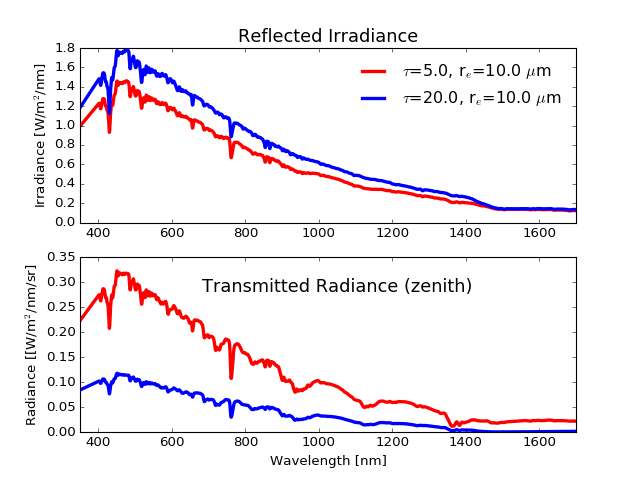

In [52]:
t1,t2 = 7,22 
r1,r2 = 8,8
fig = plt.figure()
ax1 = plt.subplot(211)
ax1.plot(lut.wvl,lut.reflect[1,:,1,r1,t1]*lut.sp_irrdn[1,:,1,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax1.plot(lut.wvl,lut.reflect[1,:,1,r2,t2]*lut.sp_irrdn[1,:,1,r1,t1],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax1.set_title('Reflected Irradiance',fontsize=16)
ax1.set_ylabel('Irradiance [W/m$^{2}$/nm]')

plt.legend(frameon=False)

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(lut.wvl,lut.sp[1,:,0,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax2.plot(lut.wvl,lut.sp[1,:,0,r2,t2],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax2.text(1050,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax2.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax2.set_xlabel('Wavelength [nm]')
ax2.set_xlim([350,1700])

plt.savefig(fp+'plots/Refl_Trans_spectra.png',transparent=True,dpi=600)

### Add the measurements

<IPython.core.display.Javascript object>


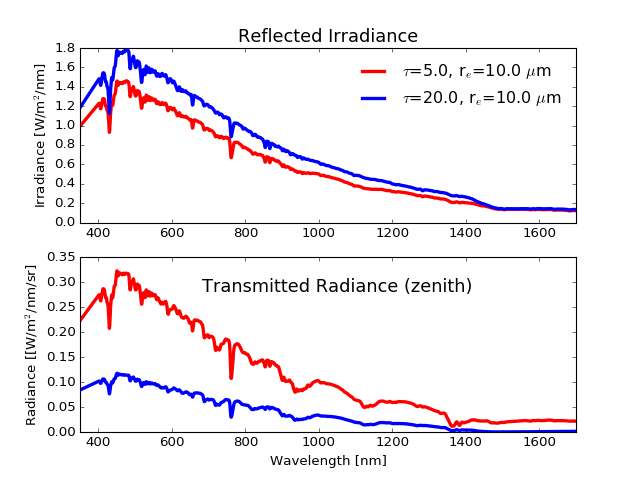

In [53]:
t1,t2 = 7,22 
r1,r2 = 8,8
fig = plt.figure()
ax1 = plt.subplot(211)
ax1.plot(lut.wvl,lut.reflect[1,:,1,r1,t1]*lut.sp_irrdn[1,:,1,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax1.plot(lut.wvl,lut.reflect[1,:,1,r2,t2]*lut.sp_irrdn[1,:,1,r1,t1],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax1.set_title('Reflected Irradiance',fontsize=16)
ax1.set_ylabel('Irradiance [W/m$^{2}$/nm]')

plt.legend(frameon=False)

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(lut.wvl,lut.sp[1,:,0,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax2.plot(lut.wvl,lut.sp[1,:,0,r2,t2],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax2.text(1050,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax2.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax2.set_xlabel('Wavelength [nm]')
ax2.set_xlim([350,1700])

plt.savefig(fp+'plots/Refl_Trans_spectra_meas.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


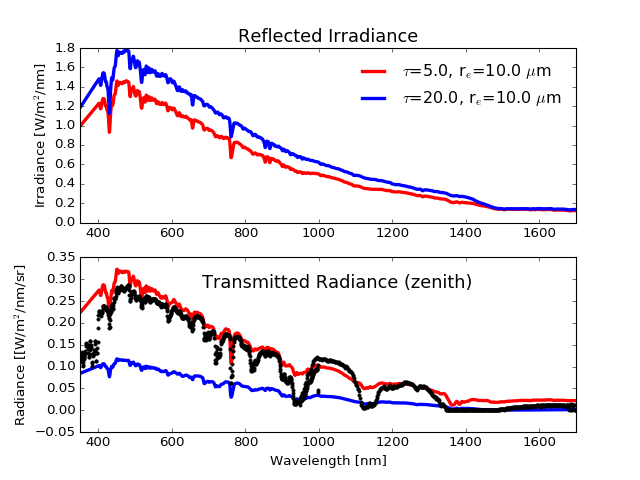

(350, 1700)

In [67]:
t1,t2 = 7,22 
r1,r2 = 8,8
fig = plt.figure()
ax1 = plt.subplot(211)
ax1.plot(lut.wvl,lut.reflect[1,:,1,r1,t1]*lut.sp_irrdn[1,:,1,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax1.plot(lut.wvl,lut.reflect[1,:,1,r2,t2]*lut.sp_irrdn[1,:,1,r1,t1],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax1.set_title('Reflected Irradiance',fontsize=16)
ax1.set_ylabel('Irradiance [W/m$^{2}$/nm]')

plt.legend(frameon=False)

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(lut.wvl,lut.sp[1,:,0,r1,t1],'r',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t1],ref=lut.ref[r1]))
ax2.plot(lut.wvl,lut.sp[1,:,0,r2,t2],'b',lw=3,
         label='$\\tau$={tau}, r$_e$={ref} $\\mu$m'.format(tau=lut.tau[t2],ref=lut.ref[r2]))

ax2.plot(meas.wvl,meas.sp[100,:]/1000.0,'k.',lw=3)

ax2.text(1050,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax2.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax2.set_xlabel('Wavelength [nm]')
ax2.set_xlim([350,1700])

#plt.savefig(fp+'plots/Refl_Trans_spectra_meas.png',transparent=True,dpi=600)

## Now plot the reflected light and transmitted light as a function of tau

<IPython.core.display.Javascript object>


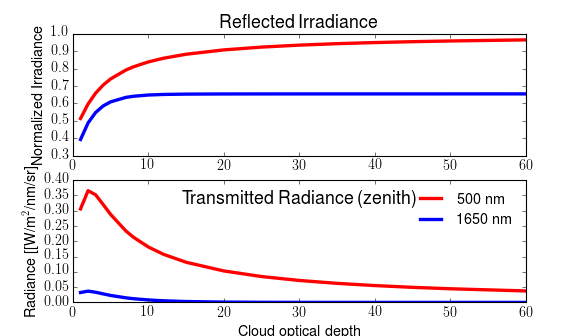

In [81]:
i500 = np.argmin(abs(lut.wvl-500.0))
i1650 = np.argmin(abs(lut.wvl-1650.0))

fig = plt.figure()
ax1 = plt.subplot(211)
ax1.plot(lut.tau,lut.reflect[1,i500,1,r1,:],'r',lw=3,
         label='{wvl:.0f} nm'.format(wvl=lut.wvl[i500]))
ax1.plot(lut.tau,lut.reflect[1,i1650,1,r2,:],'b',lw=3,
         label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1650]))

ax1.set_title('Reflected Irradiance',fontsize=16)
ax1.set_ylabel('Normalized Irradiance')

ax2 = plt.subplot(212,sharex=ax1)
ax2.plot(lut.tau,lut.sp[1,i500,0,r1,:],'r',lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i500]))
ax2.plot(lut.tau,lut.sp[1,i1650,0,r2,:],'b',lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1650]))

ax2.text(30,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax2.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax2.set_xlabel('Cloud optical depth')
ax2.set_xlim([0,60])

plt.legend(frameon=False)
plt.savefig(fp+'plots/Refl_Trans_cod.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>


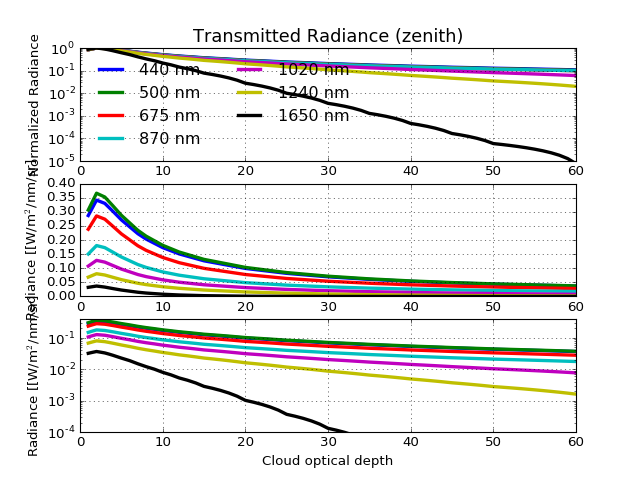

In [34]:
i440 = np.argmin(abs(lut.wvl-440.0))
i500 = np.argmin(abs(lut.wvl-500.0))
i675 = np.argmin(abs(lut.wvl-675.0))
i870 = np.argmin(abs(lut.wvl-870.0))
i1020 = np.argmin(abs(lut.wvl-1020.0))
i1240 = np.argmin(abs(lut.wvl-1240.0))
i1650 = np.argmin(abs(lut.wvl-1650.0))

t1,t2 = 7,22 
r1,r2 = 8,8

fig = plt.figure()
ax1 = plt.subplot(311)

ax1.plot(lut.tau,lut.sp[1,i440,0,r1,:]/max(lut.sp[1,i440,0,r1,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i440]))
ax1.plot(lut.tau,lut.sp[1,i500,0,r1,:]/max(lut.sp[1,i500,0,r1,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i500]))
ax1.plot(lut.tau,lut.sp[1,i675,0,r2,:]/max(lut.sp[1,i675,0,r2,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i675]))
ax1.plot(lut.tau,lut.sp[1,i870,0,r1,:]/max(lut.sp[1,i870,0,r1,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i870]))
ax1.plot(lut.tau,lut.sp[1,i1020,0,r2,:]/max(lut.sp[1,i1020,0,r2,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1020]))
ax1.plot(lut.tau,lut.sp[1,i1240,0,r2,:]/max(lut.sp[1,i1240,0,r2,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1240]))
ax1.plot(lut.tau,lut.sp[1,i1650,0,r2,:]/max(lut.sp[1,i1650,0,r2,:]),lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1650]))

ax1.set_ylim(0.00001,1.0)
ax1.set_yscale('log')
ax1.grid()
plt.legend(frameon=False,ncol=2,loc=3)

#plt.legend(frameon=False)

ax1.set_title('Transmitted Radiance (zenith)',fontsize=16)
ax1.set_ylabel('Normalized Radiance')

ax2 = plt.subplot(312,sharex=ax1)
ax2.plot(lut.tau,lut.sp[1,i440,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i440]))
ax2.plot(lut.tau,lut.sp[1,i500,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i500]))
ax2.plot(lut.tau,lut.sp[1,i675,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i675]))
ax2.plot(lut.tau,lut.sp[1,i870,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i870]))
ax2.plot(lut.tau,lut.sp[1,i1020,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1020]))
ax2.plot(lut.tau,lut.sp[1,i1240,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1240]))
ax2.plot(lut.tau,lut.sp[1,i1650,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1650]))

#ax2.text(30,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax2.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax2.set_xlabel('Cloud optical depth')
ax2.set_xlim([0,60])

ax2.grid()

ax3 = plt.subplot(313,sharex=ax1)
ax3.plot(lut.tau,lut.sp[1,i440,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i440]))
ax3.plot(lut.tau,lut.sp[1,i500,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i500]))
ax3.plot(lut.tau,lut.sp[1,i675,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i675]))
ax3.plot(lut.tau,lut.sp[1,i870,0,r1,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i870]))
ax3.plot(lut.tau,lut.sp[1,i1020,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1020]))
ax3.plot(lut.tau,lut.sp[1,i1240,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1240]))
ax3.plot(lut.tau,lut.sp[1,i1650,0,r2,:],lw=3,
          label='{wvl:.0f} nm'.format(wvl=lut.wvl[i1650]))

#ax2.text(30,0.8*ax2.get_ybound()[1],'Transmitted Radiance (zenith)',fontsize=16,horizontalalignment='center')
ax3.set_ylabel('Radiance [[W/m$^{2}$/nm/sr]')
ax3.set_xlabel('Cloud optical depth')
ax3.set_xlim([0,60])

ax3.set_ylim(0.0001,0.4)
ax3.set_yscale('log')
ax3.grid()

plt.savefig(fp+'plots/Trans_cod_various.png',transparent=True,dpi=600)

In [37]:
print max(lut.sp[1,i440,0,r1,:]), \
max(lut.sp[1,i500,0,r1,:]), \
max(lut.sp[1,i675,0,r1,:]), \
max(lut.sp[1,i870,0,r1,:]), \
max(lut.sp[1,i1020,0,r1,:]), \
max(lut.sp[1,i1240,0,r1,:]), \
max(lut.sp[1,i1650,0,r1,:]), \

0.341260105371 0.36572059989 0.285298466682 0.180314585567 0.127877444029 0.0805999785662 0.0369348488748


In [38]:
print min(lut.sp[1,i440,0,r1,:]), \
min(lut.sp[1,i500,0,r1,:]), \
min(lut.sp[1,i675,0,r1,:]), \
min(lut.sp[1,i870,0,r1,:]), \
min(lut.sp[1,i1020,0,r1,:]), \
min(lut.sp[1,i1240,0,r1,:]), \
min(lut.sp[1,i1650,0,r1,:]), \

0.0224909763783 0.0228045973927 0.0169955361634 0.0106788743287 0.00249312515371 0.000176811416168 7.65628116461e-11


## Now plot the lut of reflected and transmitted light

In [56]:
w500 = np.argmin(abs(lut.wvl-500.0))
w750 = np.argmin(abs(lut.wvl-742.0))
w1700 = np.argmin(abs(lut.wvl-1700.0))
w1650 = np.argmin(abs(lut.wvl-1650.0))
w1250 = np.argmin(abs(lut.wvl-1250.0))

<IPython.core.display.Javascript object>


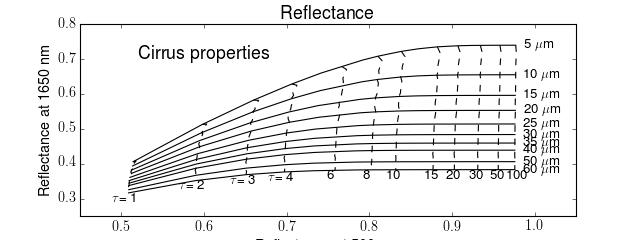

In [191]:
plt.figure(figsize=(8,3))
taus = [1,2,3,4,6,8,10,15,20,30,50,100]
refs = [1,5,10,15,20,25,30,35,40,50,60]
for ir,r in enumerate(lut.ref):
    if r in refs: 
        plt.plot(lut.reflect[1,w500,1,ir,:],lut.reflect[1,w1650,1,ir,:],'k-')
        plt.annotate('%2i $\mu$m'%r,xy=(lut.reflect[1,w500,1,ir,-1]+0.01,lut.reflect[1,w1650,1,ir,-1]-0.01))
for it,t in enumerate(lut.tau):
    if t in taus:
        plt.plot(lut.reflect[1,w500,1,:,it],lut.reflect[1,w1650,1,:,it],'k--')
        if t<6:
            plt.annotate('$\\tau$=%2i'%t,xy=(lut.reflect[1,w500,1,-1,it]-0.02,lut.reflect[1,w1650,1,-1,it]-0.025))
        else:
            plt.annotate('%2i'%t,xy=(lut.reflect[1,w500,1,-1,it]-0.01,lut.reflect[1,w1650,1,-1,it]-0.025))
plt.xlabel('Reflectance at 500 nm') 
plt.ylabel('Reflectance at 1650 nm')
plt.title('Reflectance',fontsize=16)
plt.text(0.6,0.7,'Cirrus properties', horizontalalignment='center',fontsize=16)
plt.xlim([0.45,1.05])
plt.ylim([0.25,0.8])
plt.savefig(fp+'plots/Reflectance_lut_ice_1650nm.png'.format(vv),dpi=600,transparent=True)

In [54]:
lut.trans = np.zeros_like(lut.sp)
for i in [0,1]:
    for it,t in enumerate(lut.tau):
        for ir,r in enumerate(lut.ref):
            for ip in [0,1]:
                lut.trans[i,:,ip,ir,it] = lut.sp[i,:,ip,ir,it]/lut.sp_irrdn[1,:,1,6,0]

<IPython.core.display.Javascript object>


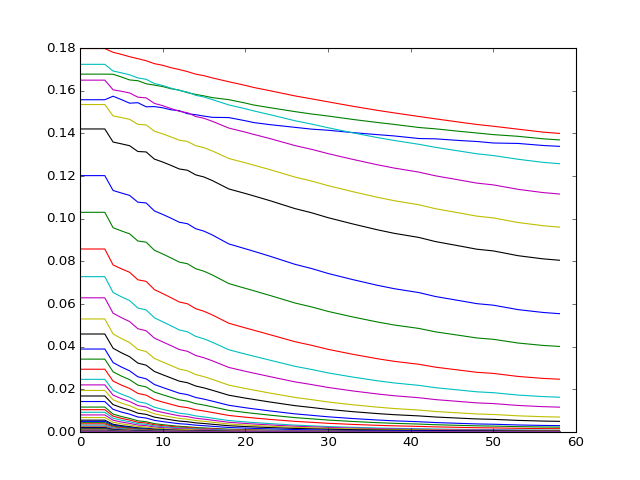

In [57]:
plt.figure()
plt.plot(lut.trans[1,w1650,0,:,:])

<IPython.core.display.Javascript object>


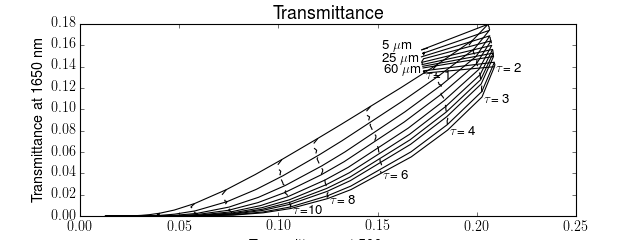

In [190]:
plt.figure(figsize=(8,3))
taus = [1,2,3,4,6,8,10,15,20,30,50,100]
refs = [5,10,15,20,25,30,35,40,50,60]
r_label = [5,25,60]
for ir,r in enumerate(lut.ref):
    if r in refs:
        plt.plot(lut.trans[1,w500,0,ir,:],lut.trans[1,w1650,0,ir,:],'k-')
        if r in r_label:
            plt.annotate('%2i $\mu$m'%r,
                         xy=(lut.trans[1,w500,0,ir,0]-0.02,lut.trans[1,w1650,0,ir,0]))
for it,t in enumerate(lut.tau):
    if t in taus:
        plt.plot(lut.trans[1,w500,0,:,it],lut.trans[1,w1650,0,:,it],'k--')
        if t<12:
            plt.annotate('$\\tau$=%2i'%t,xy=(lut.trans[1,w500,0,-1,it]+0.001,lut.trans[1,w1650,0,-1,it]-0.005))
        else:
            plt.annotate('%2i'%t,xy=(lut.trans[1,w500,0,-1,it]+0.002,lut.trans[1,w1650,0,-1,it]-0.005))
plt.xlabel('Transmittance at 500 nm') 
plt.ylabel('Transmittance at 1650 nm')
plt.title('Transmittance',fontsize=16)
#plt.text(0.6,0.7,'Cirrus properties', horizontalalignment='center',fontsize=16)
#plt.xlim([0.45,1.05])
#plt.ylim([0.25,0.8])
plt.savefig(fp+'plots/transmittance_lut_ice_1650nm.png'.format(vv),dpi=600,transparent=True)

In [164]:
lut.trans[1,w1650,0,3,0]

0.15574937390307095

## Movie of spectral changes in transmitted light and reflected light

# Now modify measurement with an uncertainty and show results

## Put on results of measured radiance and retrieved properties